In [ ]:
# do
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
#User should change input nodes and hidden nodes as per input size
import tensorflow as tf
import pandas as pd
import cv2
import glob
import numpy as np
import random
from google.colab.patches import cv2_imshow

In [ ]:
def rotate_image(image, angle ):
    img_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(img_center, angle, 1.0)
    rotated = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated
def img_augmentor(image):
  res= []
  for angle in np.arange(0, 360, 15):
    #background mask
    bgmask=np.zeros((image.shape[:2]), np.uint8)
    cv2.circle(bgmask, ( int(bgmask.shape[0]/2), int(bgmask.shape[1]/2) ), 32, (255), -1)
    #cell mask
    cellmask=cv2.bitwise_not(bgmask)
    #cell background
    bg = cv2.bitwise_or(image, image, mask=cellmask)
    #rotate img
    rotated=rotate_image(image, angle)
    #cell cropping
    cell= cv2.bitwise_or(rotated, rotated, mask=bgmask)
    final = cv2.bitwise_or(bg, cell)
    #cv2_imshow(final)
    final = np.array(final)
    res.append(final)
  return res
    #disp
    #cv.imshow("final mask", final)
    #cv.waitKey(0)
    
    #save rotated image on pc
    #cv.imwrite("imgrot"+str(angle)+".png", final)
    
    #save flattened img into csv
    #finalflat= final.flatten()/255.0
    #write this to excel
    
    #cv.destroyAllWindows()
def canaug(img):
  img = np.array(img)
  img = img.reshape((50,50))
  final_train_data = []
  final_train_data.append(img)
  final_train_data.append(np.fliplr(img))
  final_train_data.append(np.flipud(img))
  for i in range(1,12):
    for j in range(3):
      final_train_data.append(rotate(final_train_data[j], angle=i, mode = 'edge'))
      final_train_data.append(rotate(final_train_data[j], angle=360-i, mode = 'edge'))
    if(i==11):
      cv2_imshow(final_train_data[-1])
  return final_train_data 

def noisy(image):
      row,col= image.shape
      mean = 0
      var = 100
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy   

In [ ]:
sz=50
xc=8
yc=58
input_nodes=sz*sz
hidden_nodes=2700
output_nodes =sz*sz
train_x_list=glob.glob("drive/My Drive/tdata/rbc/*.png")
train_x_list.extend(glob.glob("drive/My Drive/tdata/HepG2/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/MCF7/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/10/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/20/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/cd4/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/cd8/*.png"))
#random.shuffle(train_x_list)
print(train_x_list)
train_images=[]
train_lis = []
x_list = []
train_lis_auginp = []
noise=[]
noise_test = []
file_name=[]
for i in range(len(train_x_list)):
  if(i%30==0):
    file_name.append(train_x_list[i])
    x_list.append(cv2.imread(train_x_list[i],0)[xc:yc,xc:yc].flatten())
  else:
    a = cv2.imread(train_x_list[i],0)
    if(train_x_list[i].split('/')[3]=='HepG2' or train_x_list[i].split('/')[3]=='MCF7'):
      for ag in img_augmentor(a):
        #train_lis_auginp.append(ag[xc:yc,xc:yc])
        train_images.append(ag[xc:yc,xc:yc].flatten())
    else:
      train_lis_auginp.append(a[xc:yc,xc:yc])
      train_images.append(a[xc:yc,xc:yc].flatten())
    #noise.append(noisy(cv2.imread(train_x_list[i],0))[11:55,11:55].flatten())
    #cv2_imshow(np.resize(noise[i],(44,44)))
#saving input list before conv to np array
train_lis = train_images
train_images=np.array(train_images)
#x_list contains test images and train_lis contains train images
print(train_images.shape)

print(train_images)

['drive/My Drive/tdata/rbc/5 (10).png', 'drive/My Drive/tdata/rbc/5 (1).png', 'drive/My Drive/tdata/rbc/5 (100).png', 'drive/My Drive/tdata/rbc/5 (102).png', 'drive/My Drive/tdata/rbc/5 (11).png', 'drive/My Drive/tdata/rbc/5 (107).png', 'drive/My Drive/tdata/rbc/5 (105).png', 'drive/My Drive/tdata/rbc/5 (109).png', 'drive/My Drive/tdata/rbc/5 (108).png', 'drive/My Drive/tdata/rbc/5 (106).png', 'drive/My Drive/tdata/rbc/5 (101).png', 'drive/My Drive/tdata/rbc/5 (103).png', 'drive/My Drive/tdata/rbc/5 (104).png', 'drive/My Drive/tdata/rbc/5 (113).png', 'drive/My Drive/tdata/rbc/5 (119).png', 'drive/My Drive/tdata/rbc/5 (117).png', 'drive/My Drive/tdata/rbc/5 (116).png', 'drive/My Drive/tdata/rbc/5 (112).png', 'drive/My Drive/tdata/rbc/5 (118).png', 'drive/My Drive/tdata/rbc/5 (111).png', 'drive/My Drive/tdata/rbc/5 (114).png', 'drive/My Drive/tdata/rbc/5 (110).png', 'drive/My Drive/tdata/rbc/5 (115).png', 'drive/My Drive/tdata/rbc/5 (12).png', 'drive/My Drive/tdata/rbc/5 (124).png', 'dri

In [ ]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:

x_train=np.array(noise[:900]).astype('float32')
x_test=np.array(train_images[:900]).astype('float32')
x_train = np.reshape(x_train, (len(x_train), 44, 44,1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 44,44,1))# adapt this if using `channels_first` image data format
print(x_train.shape)

x_train_noisy = x_train 
x_test_noisy = x_test

(900, 44, 44, 1)


MODEL 1

In [ ]:

model = Sequential()
inp=(44,44,1)
model.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Conv2D(32, (3, 3),padding="same"))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Conv2D(32, (5, 5),padding="same"))
model.add(Activation('relu'))
#model.add(UpSampling2D())
model.add(Conv2D(1, (1, 1),padding="same"))
model.add(Flatten())
model.add(Dense(44*44,activation='relu'))
model.summary()
model.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model.fit(x_train, x_test,
                epochs=1,
                batch_size=1,
                shuffle=True)
decoded_imgs = model.predict(np.array(x_train[901:]))



(900, 44, 44, 1)
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 44, 44, 32)        320       
_________________________________________________________________
activation_142 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
activation_143 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_144 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 

In [ ]:

n = 100
decoded_imgs = model.predict(np.reshape(noise[901:], (len(noise[901:]), 44,44,1)))
print(x_train.shape)
plt.figure(figsize=(20, 4))
'''
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[901+i].reshape(44,44))
    plt.gray()
    plt.show()    
    plt.figure(figsize=(2,2))
    plt.imshow(noise[901+i].reshape(44,44))
    plt.gray()
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(decoded_imgs[i].reshape(44, 44))
    plt.gray()
    plt.show()
'''

(900, 44, 44, 1)


'\nfor i in range(n):\n    plt.figure(figsize=(2,2))\n    plt.imshow(train_images[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()    \n    plt.figure(figsize=(2,2))\n    plt.imshow(noise[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()\n    plt.figure(figsize=(2,2))\n    plt.imshow(decoded_imgs[i].reshape(44, 44))\n    plt.gray()\n    plt.show()\n'

<Figure size 1440x288 with 0 Axes>

In [ ]:
'''
import math
import matplotlib.pyplot as pypt
def snr(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        avgimg = np.mean(imgar[22][:])
        avgnois = np.mean(noisar[22][:])
        avgrecon = np.mean(reconar[22][:])
        imgstd = np.std(imgar[22][:])
        noisstd = np.std(noisar[22][:])
        reconstd = np.std(reconar[22][:])
        imgabs = np.amax(imgar[22][:]) - np.amin(imgar[22][:])
        noisabs = np.amax(noisar[22][:]) - np.amin(noisar[22][:])
        reconabs = np.amax(reconar[22][:]) - np.amin(reconar[22][:])
        imgsnr = abs((np.amax(imgar[22][:]) - np.amin(imgar[22][:]))/imgstd)
        noissnr = abs((np.amax(noisar[22][:]) - np.amin(noisar[22][:]))/noisstd)
        reconsnr = abs((np.amax(reconar[22][:]) - np.amin(reconar[22][:]))/reconstd)
        snr.append(imgsnr)
        snr.append(noissnr)
        snr.append(reconsnr)
        snrfinal.append(snr)
        
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal
snratio = []
snratio = snr(train_images[901:],noise[901:],decoded_imgs)
print("SNR 1")
print(snratio)
def snr2(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        avgimg = np.mean(imgar[22][:])
        avgnois = np.mean(noisar[22][:])
        avgrecon = np.mean(reconar[22][:])
        imgstd = np.std(imgar[22][:])
        noisstd = np.std(noisar[22][:])
        reconstd = np.std(reconar[22][:])
        imgabs = np.amax(imgar[22][:]) - np.amin(imgar[22][:])
        noisabs = np.amax(noisar[22][:]) - np.amin(noisar[22][:])
        reconabs = np.amax(reconar[22][:]) - np.amin(reconar[22][:])
        imgsnr = 10 * math.log(abs((np.amax(imgar[22][:]) - np.amin(imgar[22][:])))/imgstd,10)
        noissnr = 10 * math.log(abs((np.amax(noisar[22][:]) - np.amin(noisar[22][:])))/noisstd,10)
        reconsnr = 10 * math.log(abs((np.amax(reconar[22][:]) - np.amin(reconar[22][:])))/reconstd,10)
        snr.append(imgsnr)
        snr.append(noissnr)
        snr.append(reconsnr)
        snrfinal.append(snr)
        
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal
snratio = []
snratio = snr2(train_images[901:],noise[901:],decoded_imgs)
print("SNR 2")
print(snratio)
def snr3(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        avgimg = np.mean(imgar[22][:])
        avgnois = np.mean(noisar[22][:])
        avgrecon = np.mean(reconar[22][:])
        imgstd = np.std(imgar[22][:])
        noisstd = np.std(noisar[22][:])
        reconstd = np.std(reconar[22][:])
        imgabs = np.amax(imgar[22][:]) - np.amin(imgar[22][:])
        noisabs = np.amax(noisar[22][:]) - np.amin(noisar[22][:])
        reconabs = np.amax(reconar[22][:]) - np.amin(reconar[22][:])
        imgsnr = 10 * math.log(abs((np.amax(imgar[22][:]) - np.amin(imgar[22][:])))**2/imgstd**2,10)
        noissnr = 10 * math.log(abs((np.amax(noisar[22][:]) - np.amin(noisar[22][:])))**2/noisstd**2,10)
        reconsnr = 10 * math.log(abs((np.amax(reconar[22][:]) - np.amin(reconar[22][:])))**2/reconstd**2,10)
        snr.append(imgsnr)
        snr.append(noissnr)
        snr.append(reconsnr)
        snrfinal.append(snr)
        
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal
snratio = []
snratio = snr3(train_images[901:],noise[901:],decoded_imgs)
print("SNR 3")
print(snratio)
def snr4(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        avgimg = np.mean(imgar[22][:])
        avgnois = np.mean(noisar[22][:])
        avgrecon = np.mean(reconar[22][:])
        imgstd = np.std(imgar[0][:])
        noisstd = np.std(noisar[0][:])
        reconstd = np.std(reconar[0][:])
        imgabs = np.amax(imgar[22][:]) - np.amin(imgar[22][:])
        noisabs = np.amax(noisar[22][:]) - np.amin(noisar[22][:])
        reconabs = np.amax(reconar[22][:]) - np.amin(reconar[22][:])
        imgsnr = abs((np.amax(imgar[22][:]) - np.amin(imgar[22][:]))/imgstd)
        noissnr = abs((np.amax(noisar[22][:]) - np.amin(noisar[22][:]))/noisstd)
        reconsnr = abs((np.amax(reconar[22][:]) - np.amin(reconar[22][:]))/reconstd)
        snr.append(imgsnr)
        snr.append(noissnr)
        snr.append(reconsnr)
        snrfinal.append(snr)
        
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal
snratio = []
snratio = snr4(train_images[901:],noise[901:],decoded_imgs)
print("SNR 4")
print(snratio)
'''

'\nimport math\nimport matplotlib.pyplot as pypt\ndef snr(imgarr,noisarr,reconarr):\n    imgar = []\n    noisar  = []\n    reconar = []\n    snrfinal = []\n    snr = []\n    for t in range(imgarr.shape[0]):\n        imgar = imgarr[t].reshape(44,44)\n        noisar = noisarr[t].reshape(44,44)\n        reconar = reconarr[t].reshape(44,44)\n        avgimg = np.mean(imgar[22][:])\n        avgnois = np.mean(noisar[22][:])\n        avgrecon = np.mean(reconar[22][:])\n        imgstd = np.std(imgar[22][:])\n        noisstd = np.std(noisar[22][:])\n        reconstd = np.std(reconar[22][:])\n        imgabs = np.amax(imgar[22][:]) - np.amin(imgar[22][:])\n        noisabs = np.amax(noisar[22][:]) - np.amin(noisar[22][:])\n        reconabs = np.amax(reconar[22][:]) - np.amin(reconar[22][:])\n        imgsnr = abs((np.amax(imgar[22][:]) - np.amin(imgar[22][:]))/imgstd)\n        noissnr = abs((np.amax(noisar[22][:]) - np.amin(noisar[22][:]))/noisstd)\n        reconsnr = abs((np.amax(reconar[22][:]) - 

In [ ]:
import math
import matplotlib.pyplot as pypt

def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[5.5696945652916305, 6.264017620985289, 5.17476366412923, 6.986316389895688, 5.2964050911182134, 3.464250293887659, 6.256215075716174, 5.337107342349775, 7.996063186740777, 7.915093129147472, 5.695431301887812, 1.66297612884431, 7.40445513406263, 5.631276388999353, 5.793650164028552, 4.912969306548, 6.61584910248969, 2.45732665393869, 5.840038422146144, 3.4173392356856205, 5.238008529504597, 5.785895731682299, 7.439845922721144, 7.620827665131802, 4.838032152207084, 3.8319936987352996, 7.25817600397669, 6.646264795220652, 4.570240794569415, 8.28451997201254, 3.3865119973743845, 4.462306232372146, 7.315903304181578, 5.404521297698551, 5.121822403114287, 5.923410812983306, 4.300139864405438, 4.621008581108242, 4.408207127726676, 4.554881023478401, 4.161891803301117, 8.149083677770768, 4.802836771162454, 5.419829649752135, 6.534585562732886, 4.275015313450336, 2.6991162232918775, 2.400140805221561, 4.608561943085316, 7.542122941527197, 6.588772677976749, 5.622753357736048, 5.3085392

MODEL 2

In [ ]:
model2 = Sequential()
inp=(66,66,1)
model2.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (3, 3),padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (5, 5),padding="same"))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (5, 5), input_shape=inp,padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (7, 7),padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (7, 7),padding="same"))
model2.add(Activation('relu'))
#model2.add(UpSampling2D())
model2.add(Conv2D(1, (1, 1),padding="same"))
model2.summary()
model2.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model2.fit(x_train, x_test,
                epochs=10,
                batch_size=1,
                shuffle=True)
decoded_imgs = model2.predict(x_train[901:])



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 66, 66, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 66, 66, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 66, 66, 32)        25632     
_________________________________________________________________
activation_21 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 66, 66, 32)       

In [ ]:
n = 100
decoded_imgs = model2.predict(np.reshape(noise[901:], (len(noise[901:]), 66,66,1)))
print(x_train.shape)
plt.figure(figsize=(20, 4))
'''
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[901+i].reshape(44,44))
    plt.gray()
    plt.show()    
    plt.figure(figsize=(2,2))
    plt.imshow(noise[901+i].reshape(44,44))
    plt.gray()
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(decoded_imgs[i].reshape(44, 44))
    plt.gray()
    plt.show()
'''

NameError: ignored

In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(66,66)
        noisar = noisarr[t].reshape(66,66)
        reconar = reconarr[t].reshape(66,66)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[2.496084137648797, 3.3873538951319766, 1.494705575088588, 7.129432752489393, 6.912481053639805, 3.794020115195238, 5.340305839027902, 3.0707431226518587, 5.392095757529116, 6.0651392004140625, 7.528942650345339, 2.1502672966905507, 6.981082922815762, 4.988544671918081, 6.63749727370946, 4.491601456894429, 8.061438470841885, 5.509579016257135, 7.239626623923407, 4.229862746194197, 4.780968614399864, 5.808395783580913, 3.527543990435877, 3.8838954757909896, 7.557383541872696, 2.062687057925938, 3.4465803459790756, 2.6370676964881383, 5.41265168293728, 6.138469917937616, 6.595073395482501, 6.846067741545564, 3.768312063139266, 5.655199150650663, 5.98556560035421, 5.044732372495293, 6.006782695010138, 5.382257143725798, 3.606580094506146, 5.834812734595882, 1.9164489067320538, 2.6830136278373935, 4.446188998713126, 5.969743839888878, 5.785619523462966, 3.88013213812609, 3.942090636199371, 4.9731115011253735, 3.4616885110996556, 4.386141895533857, 6.083746743256956, 2.079517311777518

MODEL 3

In [ ]:
model3 = Sequential()
inp=(44,44,1)
model3.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (3, 3),padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (3, 3),padding="same"))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (5, 5), input_shape=inp,padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (5, 5),padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (5, 5),padding="same"))
model3.add(Activation('relu'))
#model3.add(UpSampling2D())
model3.add(Conv2D(1, (1, 1),padding="same"))
model3.summary()
model3.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model3.fit(x_train, x_test,
                epochs=10,
                batch_size=1,
                shuffle=True)
decoded_imgs = model3.predict(x_train[901:])



Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 44, 44, 32)        320       
_________________________________________________________________
activation_151 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
activation_152 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
activation_153 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 44, 44, 32)      

In [ ]:
n = 100
decoded_imgs = model3.predict(np.reshape(noise[901:], (len(noise[901:]), 44,44,1)))
print(x_train.shape)
plt.figure(figsize=(20, 4))
'''
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[901+i].reshape(44,44))
    plt.gray()
    plt.show()    
    plt.figure(figsize=(2,2))
    plt.imshow(noise[901+i].reshape(44,44))
    plt.gray()
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(decoded_imgs[i].reshape(44, 44))
    plt.gray()
    plt.show()
'''

(900, 44, 44, 1)


'\nfor i in range(n):\n    plt.figure(figsize=(2,2))\n    plt.imshow(train_images[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()    \n    plt.figure(figsize=(2,2))\n    plt.imshow(noise[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()\n    plt.figure(figsize=(2,2))\n    plt.imshow(decoded_imgs[i].reshape(44, 44))\n    plt.gray()\n    plt.show()\n'

<Figure size 1440x288 with 0 Axes>

In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[6.281555373617756, 7.382760582676223, 6.299911905177552, 7.4548945128707125, 5.512760083130068, 3.70675817399993, 5.135991295333156, 6.1399184693114215, 7.709799963950012, 8.38540523408669, 6.151642211262047, 1.0280609055925858, 7.098181797490607, 5.932623877899061, 5.592647140246967, 6.255865123457475, 6.867435083040963, 3.301627443498589, 5.413833837249879, 2.7175312255747635, 5.728380193941696, 6.991447533429472, 6.076326919393715, 8.158810883290442, 5.34938957696469, 4.681891855951335, 7.291191338099992, 6.811215060780615, 4.953249959157475, 6.514087574276818, 0.9593448622098606, 5.883143303155062, 5.843409323762543, 5.78648659054792, 5.499439010508695, 7.381529447349674, 3.2483053300727995, 4.29621767562589, 5.290874551732397, 5.859066990945671, 5.0259189246992015, 8.704138173431584, 4.393269203243651, 5.430193649464982, 6.288569098968704, 4.8680678874406915, 3.72658898939644, 1.3785449736618922, 4.480090006166645, 8.311924839460218, 7.807930041208525, 6.107198949529071, 3.

MODEL 4

In [ ]:
model4 = Sequential()
inp=(44,44,1)
model4.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (3, 3),padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (3, 3),padding="same"))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (3, 3),padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (3, 3),padding="same"))
model4.add(Activation('relu'))
#model4.add(UpSampling2D())
model4.add(Conv2D(1, (1, 1),padding="same"))
model4.summary()
model4.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model4.fit(x_train, x_test,
                epochs=10,
                batch_size=1,
                shuffle=True)
decoded_imgs = model4.predict(x_train[901:])



Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_186 (Conv2D)          (None, 44, 44, 32)        320       
_________________________________________________________________
activation_157 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
activation_158 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
activation_159 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 44, 44, 32)      

In [ ]:
n = 100
decoded_imgs = model4.predict(np.reshape(noise[901:], (len(noise[901:]), 44,44,1)))
print(x_train.shape)
plt.figure(figsize=(20, 4))
'''
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[901+i].reshape(44,44))
    plt.gray()
    plt.show()    
    plt.figure(figsize=(2,2))
    plt.imshow(noise[901+i].reshape(44,44))
    plt.gray()
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(decoded_imgs[i].reshape(44, 44))
    plt.gray()
    plt.show()
'''

(900, 44, 44, 1)


'\nfor i in range(n):\n    plt.figure(figsize=(2,2))\n    plt.imshow(train_images[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()    \n    plt.figure(figsize=(2,2))\n    plt.imshow(noise[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()\n    plt.figure(figsize=(2,2))\n    plt.imshow(decoded_imgs[i].reshape(44, 44))\n    plt.gray()\n    plt.show()\n'

<Figure size 1440x288 with 0 Axes>

In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[5.582210129592209, 7.748223823329116, 7.033329144846078, 6.7893511537579165, 6.165306855229268, 5.958808195829366, 4.985983338087234, 5.60684290941386, 9.214136722902026, 6.723074034197161, 5.413064888555837, 2.980231627333339, 8.613540346073101, 5.7088815733747715, 6.651230546780642, 5.102415705214828, 6.814901661139871, 3.2923779259662638, 5.622319083686275, 4.609911790810916, 5.1914652172375355, 6.604034787108819, 6.1022639134710275, 7.965537002839284, 5.675163765971902, 5.188011827940308, 5.760536628282903, 6.75583508981714, 5.104051112435613, 7.183284279685967, 2.9897095775554945, 7.15001754496874, 8.257096546279719, 5.95004085253635, 7.238249684920834, 7.075489058232733, 4.961374164524113, 4.5092587404368345, 5.2829340125106405, 5.8155115333414145, 5.186004963808021, 8.265226408997481, 5.105655385567793, 5.3865747656008445, 4.6277269030290995, 5.2058448498955805, 4.157186405288936, 4.012677597887141, 6.393935447384262, 8.555669051463049, 7.657658552072249, 6.04583003910298

MODEL 5

In [ ]:
model5 = Sequential()
inp=(44,44,1)
model5.add(Conv2D(32, (5, 5), input_shape=inp,padding="same"))
model5.add(Activation('relu'))
#model5.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model5.add(Conv2D(32, (5, 5),padding="same"))
model5.add(Activation('relu'))
#model5.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model5.add(Conv2D(32, (5, 5),padding="same"))
model5.add(Activation('relu'))
model5.add(Conv2D(32, (5, 5), input_shape=inp,padding="same"))
model5.add(Activation('relu'))
#model5.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model5.add(Conv2D(32, (5, 5),padding="same"))
model5.add(Activation('relu'))
#model5.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model5.add(Conv2D(32, (5, 5),padding="same"))
model5.add(Activation('relu'))
#model5.add(UpSampling2D())
model5.add(Conv2D(1, (1, 1),padding="same"))
model5.summary()
model5.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model5.fit(x_train, x_test,
                epochs=10,
                batch_size=1,
                shuffle=True)
decoded_imgs = model5.predict(x_train[901:])



Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_193 (Conv2D)          (None, 44, 44, 32)        832       
_________________________________________________________________
activation_163 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_164 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_165 (Activation)  (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 44, 44, 32)      

In [ ]:
n = 100
decoded_imgs = model5.predict(np.reshape(noise[901:], (len(noise[901:]), 44,44,1)))
print(x_train.shape)
plt.figure(figsize=(20, 4))
'''
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[901+i].reshape(44,44))
    plt.gray()
    plt.show()    
    plt.figure(figsize=(2,2))
    plt.imshow(noise[901+i].reshape(44,44))
    plt.gray()
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(decoded_imgs[i].reshape(44, 44))
    plt.gray()
    plt.show()
'''

(900, 44, 44, 1)


'\nfor i in range(n):\n    plt.figure(figsize=(2,2))\n    plt.imshow(train_images[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()    \n    plt.figure(figsize=(2,2))\n    plt.imshow(noise[901+i].reshape(44,44))\n    plt.gray()\n    plt.show()\n    plt.figure(figsize=(2,2))\n    plt.imshow(decoded_imgs[i].reshape(44, 44))\n    plt.gray()\n    plt.show()\n'

<Figure size 1440x288 with 0 Axes>

In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[2.8255920167699813, 3.604932242578162, 5.120818969420718, 8.815627275055235, 2.7807810960490897, 1.9902256233056086, -0.03841262033560966, 0.055240908768631414, 7.180669792718227, 3.8700247107049286, 2.8119336437846094, 1.475594882061909, 5.355537606307131, 1.768053242822159, 3.3180429201182307, 3.527354199897893, 1.855132361119363, 1.1532161941155046, 2.165244974361311, 3.650392717560404, 1.7447183621356643, 5.379704941562213, 7.887563177474014, 4.143653517745555, 2.5834480499606194, 3.5587667149451327, 4.170533292502977, 1.079710951504044, 2.604621693264793, 3.345856630392401, -0.8286863482083717, 4.580293210094332, 5.873022160889896, 2.796767226694442, 4.944563266435914, 4.21756955457942, 4.435918117411958, 3.339320664173421, 3.445901055256158, 1.536217625430229, 4.098909867874362, 4.487129841515177, 1.5770155397071903, 5.525957773845551, 2.8857518329853065, 1.6472748623173992, 0.6941761092474756, 0.9091202713069251, 5.396822365711937, 4.575532403941864, 4.4890190029300925, 5

MODEL 6

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 44, 44, 32)        832       
_________________________________________________________________
activation_25 (Activation)   (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_26 (Activation)   (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_27 (Activation)   (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 44, 44, 32)       

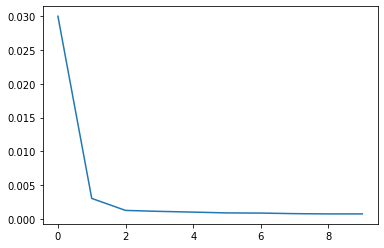

In [ ]:
model6 = Sequential()
inp=(44,44,1)
model6.add(Conv2D(32, (5, 5), input_shape=inp,padding="same"))
model6.add(Activation('relu'))
#model6.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model6.add(Conv2D(32, (5, 5),padding="same"))
model6.add(Activation('relu'))
#model6.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model6.add(Conv2D(32, (5, 5),padding="same"))
model6.add(Activation('relu'))
model6.add(Conv2D(32, (7, 7), input_shape=inp,padding="same"))
model6.add(Activation('relu'))
#model6.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model6.add(Conv2D(32, (7, 7),padding="same"))
model6.add(Activation('relu'))
#model6.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model6.add(Conv2D(32, (7, 7),padding="same"))
model6.add(Activation('relu'))
#model6.add(UpSampling2D())
model6.add(Conv2D(1, (1, 1),padding="same"))
model6.summary()
model6.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

history=model6.fit(x_train, x_test,
                epochs=10,
                batch_size=1,
                shuffle=True)
decoded_imgs = model6.predict(x_train[901:])

print(history.history)
plt.plot(history.history['loss'])


In [ ]:
# n = 100
# decoded_imgs = model6.predict(np.reshape(noise[901:], (len(noise[901:]), 44,44,1)))
# print(x_train.shape)
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     plt.figure(figsize=(2,2))
#     plt.imshow(train_images[901+i].reshape(44,44))
#     plt.gray()
#     plt.show()    
#     plt.figure(figsize=(2,2))
#     plt.imshow(noise[901+i].reshape(44,44))
#     plt.gray()
#     plt.show()
#     plt.figure(figsize=(2,2))
#     plt.imshow(decoded_imgs[i].reshape(44, 44))
#     plt.gray()
#     plt.show()

(854, 44, 44, 1)


IndexError: ignored

<Figure size 1440x288 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(44,44)
        noisar = noisarr[t].reshape(44,44)
        reconar = reconarr[t].reshape(44,44)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[22][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        '''
        pypt.plot(imgar[22])
        pypt.show()
        pypt.plot(noisar[22])
        pypt.show()
        pypt.plot(reconar[22])
        pypt.show()
        '''
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(train_images[901:],noise[901:],decoded_imgs)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))
snrtablefinal.append(np.mean(snratio))

SNR 5
[2.333605218469927, 6.175361547786274, 4.080554603336889, 2.125175106170051, 2.0297296797709805, 3.4590200539197298, 6.016949080981977, 4.252879011845142, 5.251356465508923, 7.212409357930056, 5.186741126825016, -3.772842456583362, 6.515565173465806, 4.679698954842326, 4.960138326912009, 6.057993837438268, 7.667660040107155, 2.97709320026512, 2.815930018742634, -2.511312919373058, 5.160312722734439, 4.336337327389451, 1.4525083252104487, 7.943209107278282, 6.318594611540949, 1.5306334981359804, 6.1119382202619015, 4.153014078540746, 5.621650894399082, 4.1156884957372775, -3.339990970507447, 2.9350581078581435, 1.3464377755044374, 3.5007661608141625, 1.340336491105404, 6.678661800040821, -0.8807370691507295, 4.714787691622487, 3.459050735725505, 3.2062945585513134, 2.082451515821379, 7.5572781401396405, 4.172157638681352, 0.3640574588059202, 3.77853918871908, 5.699787102270175, 2.2397666087743318, -2.8312843770592586, 2.6507153219419166, 7.655835475376772, 5.580872711758232, 5.579

In [ ]:
print(snrtablefinal)

[5.461652281541653, 4.984778126308711, 5.546314062555707, 5.942727031042939, 3.2210046514538018, 3.6894577057449225]
